<a href="https://colab.research.google.com/github/leeCodingStudio/Python_machine_learning/blob/master/8_%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 손글씨 데이터셋 살펴보기

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
data = digits['data']
data.shape

(1797, 64)

In [6]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
target = digits['target']
target.shape

(1797,)

In [8]:
import matplotlib.pyplot as plt

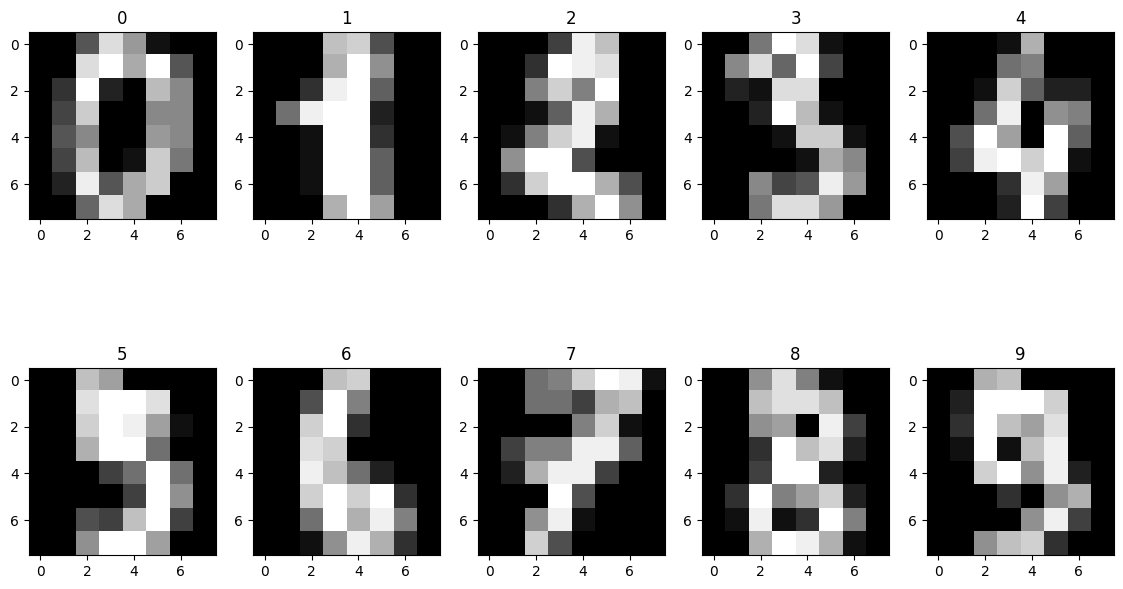

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(14, 8))

# flatten: 다차원을 1차원으로 바꿔주는 메소드
for i, ax in enumerate(axes.flatten()):
    ax.imshow(data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(target[i])

Figure(1400x800)
[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]


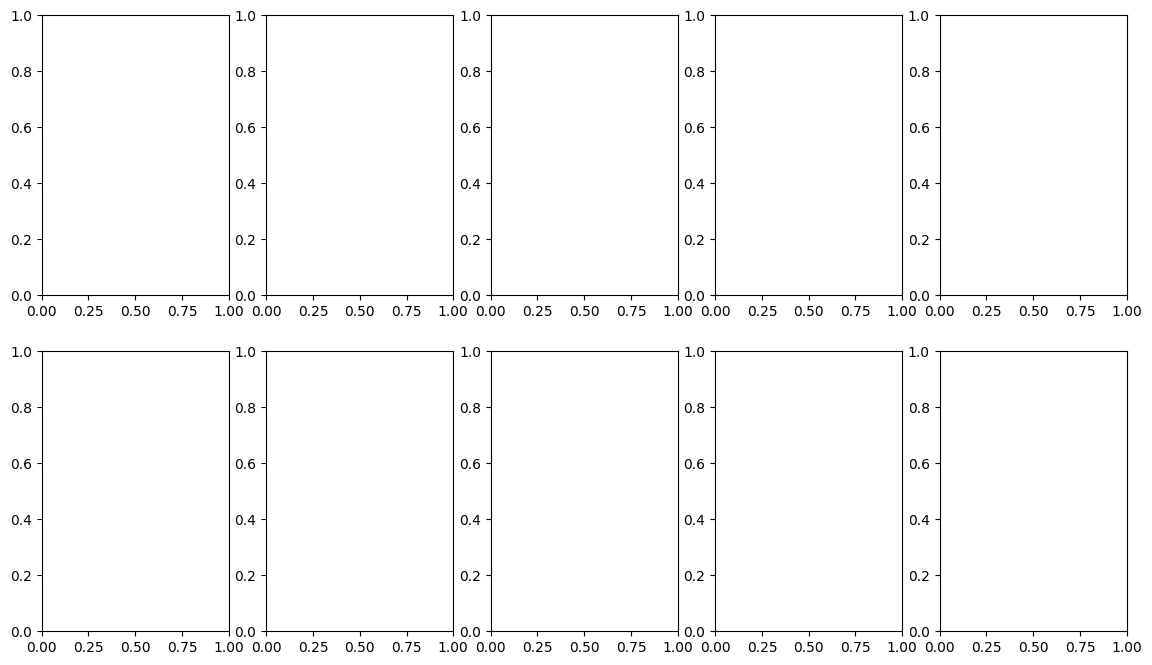

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(14, 8))
print(fig)
print(axes)

# 2. 정규화

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [17]:
scaled = scaler.fit_transform(data)
scaled[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


# 3. Support Vector Machine(SVM)
* 두 클래스로부터 최대한 멀리 떨어져 있는 결정 경계를 찾는 분류기로 특정 조건을 만족하는 동시에 클래스를 분류하는 것을 목표로 함
<img src="https://i.imgur.com/l1NQNvD.png" width="700px">

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [23]:
model = SVC()

In [24]:
model.fit(X_train, y_train)

SVC()

In [25]:
y_pred = model.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9861111111111112

5 5


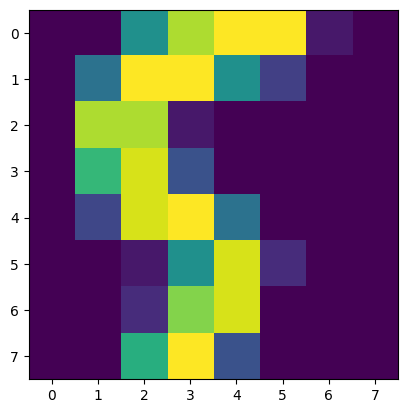

In [30]:
print(y_test[0], y_pred[0])
plt.imshow(X_test[0].reshape(8, 8))
plt.show()

In [32]:
import matplotlib.pyplot as plt

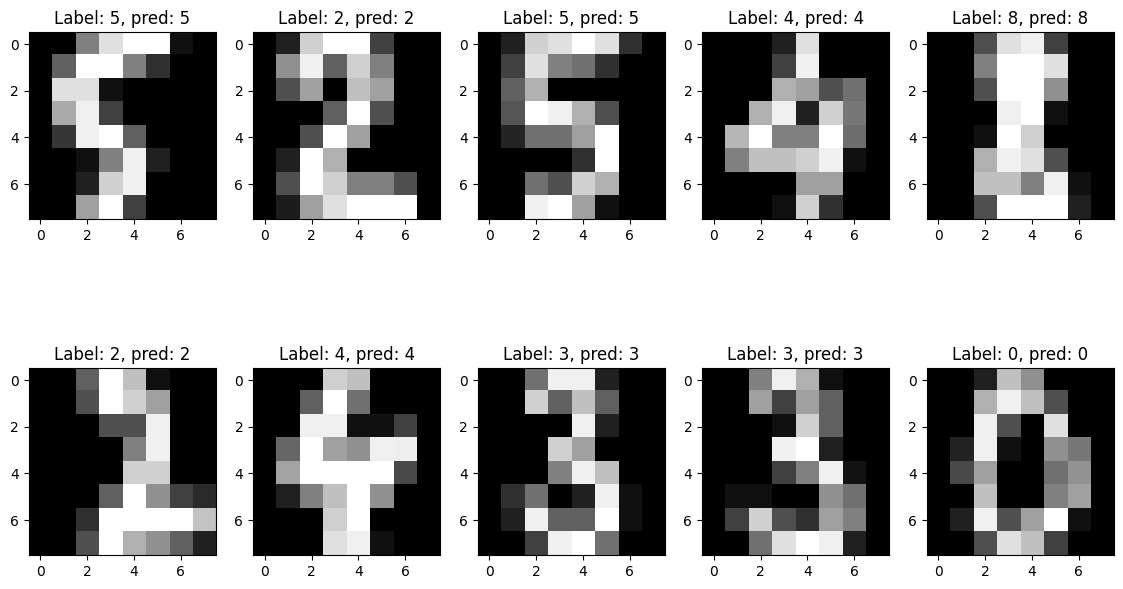

In [35]:
fig, axes = plt.subplots(2, 5, figsize=(14, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Label: {y_test[i]}, pred: {y_pred[i]}')